In [6]:
import pandas as pd
import numpy as np
import random
import xlrd
import itertools
import pylab
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


df_case = pd.read_csv('C:\\Users\\henrique.malone\\Desktop\\ifood.csv')

df_case

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
df_case.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [117]:
df_case.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [120]:
# % valores em branco no arquivo CSV
round(df_case.isnull().mean() *100,2) 

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [165]:
# preencher valores em branco com 0
df_case["Income"] = np.where((df_case["Income"].isnull()) , "0", df_case["Income"])


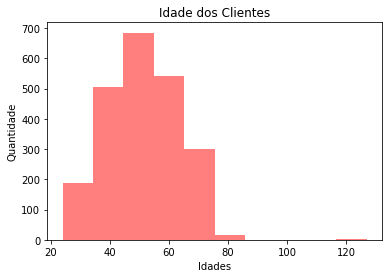

In [9]:

# gráfico de idade dos clientes
separador = ','
idade = []
anoAtual = 2020

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            ano = anoAtual - int(colunas[1])
            idade.append(ano)

plt.title("Idade dos Clientes")
plt.xlabel("Idades")
plt.ylabel("Quantidade")

plt.hist(idade, alpha = 0.5, color = 'r')
plt.show()

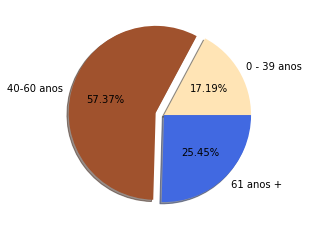

In [42]:
i = 0
aux1 = 0
aux2 = 0
aux3 = 0

while i < len(idade):
    if int(idade[i])  > 0 and int(idade[i]) < 40:
        aux1 += 1
    if int(idade[i])  >= 40 and int(idade[i]) <= 60:
        aux2 += 1
    if int(idade[i])  > 60:
        aux3 += 1
    i += 1
    
vendas = [aux1, aux2, aux3]
tipo_vendas = ['0 - 39 anos','40-60 anos', '61 anos +']
colors = ['moccasin', 'sienna', 'royalblue']

explode = (0.0, 0.1, 0.0) 

plt.pie(vendas, labels=tipo_vendas, autopct='%.2f%%', shadow=True, explode=explode, colors = colors)

plt.show()

In [6]:
#média idade
print(sum(idade) / len(idade))

51.19419642857143


<AxesSubplot:ylabel='Education'>

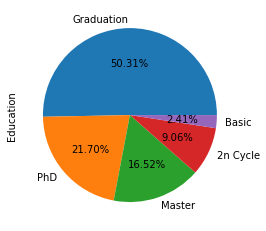

In [138]:
# % do nivel de escolaridade dos clientes
df_case.Education.value_counts().plot(kind='pie', autopct='%.2f%%')

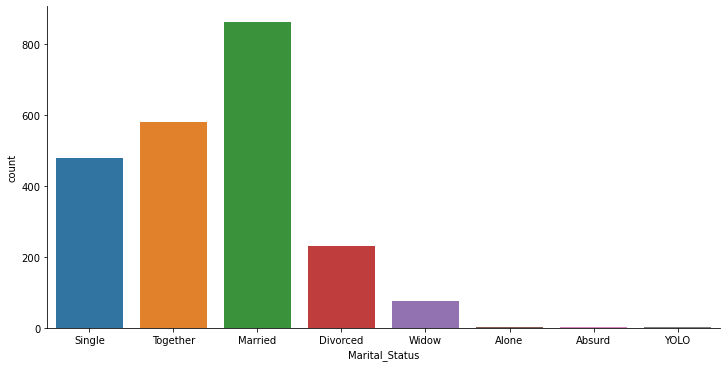

In [340]:
sns.catplot(x='Marital_Status', data = df_case, kind="count", height=5, aspect=2)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


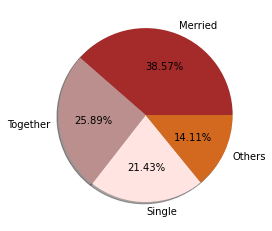

In [83]:
print(df_case.Marital_Status.value_counts())

qtd = [864, 580, 480, 316]
estado = ['Merried', 'Together', 'Single', 'Others']
colors = ['brown', 'rosybrown', 'mistyrose', 'chocolate']

plt.pie(qtd, labels=estado, autopct='%.2f%%', shadow=True, colors = colors)

plt.show()

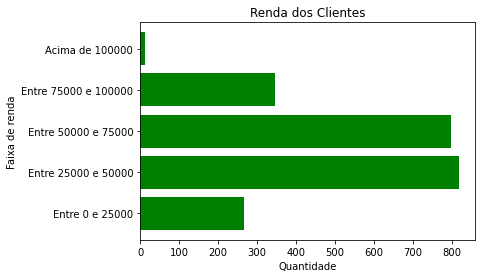

In [46]:
separador = ','
renda = []
i = 0

# salva rendas em um vetor
with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            renda.append(colunas[4])

# preenche campos vazio com 0
while i < len(renda):
    if renda[i] == "":
        renda[i] = "0"
    i += 1

i = 0
a = 0
b = 0
c = 0 
d = 0

e = 0
f = 0
g = 0
h = 0
i = 0

# preenche cada classe de vetor com a renda adequada
while i < len(renda):
    if float(renda[i]) <= 25000:
        a += 1
    if float(renda[i]) > 25000 and float(renda[i]) <= 50000:
        b += 1
    if float(renda[i]) > 50000 and float(renda[i]) <= 75000:
        c += 1
    if float(renda[i]) > 75000 and float(renda[i]) <= 100000:
        d += 1
    if float(renda[i]) > 100000:
        e += 1
    i += 1

rendas = ['Entre 0 e 25000', 'Entre 25000 e 50000', 'Entre 50000 e 75000', 'Entre 75000 e 100000', 'Acima de 100000']
freq = [a, b, c, d, e]

plt.barh(rendas, freq, color='g' )
plt.ylabel("Faixa de renda")
plt.xlabel("Quantidade")
plt.title("Renda dos Clientes")
plt.show()



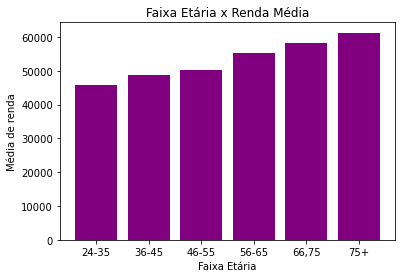

In [63]:
faixaEtaria = []
faixaRenda = []
i = 0
rendaa = []
rendab = []
rendac = []
rendad = []
rendae = []
rendaf = []

df_case["Idade"] = 2020 - df_case["Year_Birth"]

while i < len(idade):
    if int(idade[i])  >= 24 and int(idade[i]) <= 35:
        faixaEtaria.append("24-35")
        rendaa.append(int(renda[i]))
    if int(idade[i])  > 35  and int(idade[i]) <= 45:
        faixaEtaria.append("36-45")
        rendab.append(int(renda[i]))
    if int(idade[i])  > 45  and int(idade[i]) <= 55:
        faixaEtaria.append("46-55")
        rendac.append(int(renda[i]))
    if int(idade[i])  > 55  and int(idade[i]) <= 65:
        faixaEtaria.append("56-65")
        rendad.append(int(renda[i]))
    if int(idade[i])  > 65  and int(idade[i]) <= 75:
        faixaEtaria.append("66-75")
        rendae.append(int(renda[i]))
    if int(idade[i])  > 75 :
        faixaEtaria.append("75+")
        rendaf.append(int(renda[i]))
    
    i += 1

df_case["Faixa Etaria"] = faixaEtaria

rendas = ['24-35', '36-45', '46-55', '56-65', '66,75', '75+']
freq = [sum(rendaa)/len(rendaa), sum(rendab)/len(rendab), sum(rendac)/len(rendac), sum(rendad)/len(rendad), sum(rendae)/len(rendae), sum(rendaf)/len(rendaf)]

plt.bar(rendas, freq, color='purple' )
plt.ylabel("Média de renda")
plt.xlabel("Faixa Etária")
plt.title("Faixa Etária x Renda Média")
plt.show()


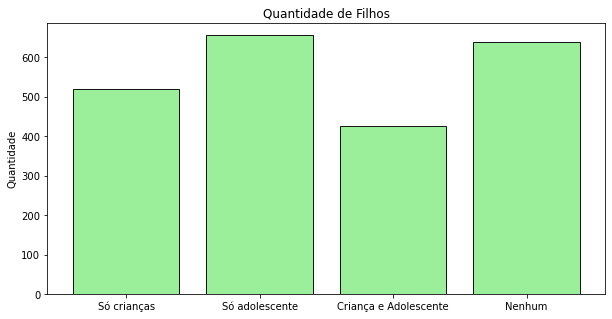

In [88]:
c = 0
a = 0
ca = 0
n = 0

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            if int(colunas[5]) > 0 and int(colunas[6]) == 0:
                c += 1
            if int(colunas[5]) == 0 and int(colunas[6]) > 0:
                a += 1
            if int(colunas[5]) > 0 and int(colunas[6]) > 0:
                ca += 1
            if int(colunas[5]) == 0 and int(colunas[6]) == 0:
                n += 1

filhos = ["Só crianças", 'Só adolescente', 'Criança e Adolescente', 'Nenhum']
freq = [c, a, ca, n]

plt.figure(figsize = (10, 5))
plt.bar(filhos, freq, ec = "k", alpha = .9, color = "lightgreen" )
plt.ylabel("Quantidade")
plt.title("Quantidade de Filhos")
plt.show()


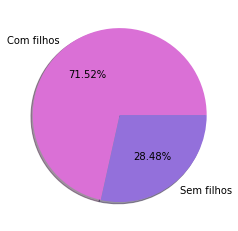

In [91]:
vendas = [c+ca+a, n]
filhos = ['Com filhos', 'Sem filhos']
colors = ['orchid', 'mediumpurple']

plt.pie(vendas, labels=filhos, autopct='%.2f%%', shadow=True, colors = colors)

plt.show()

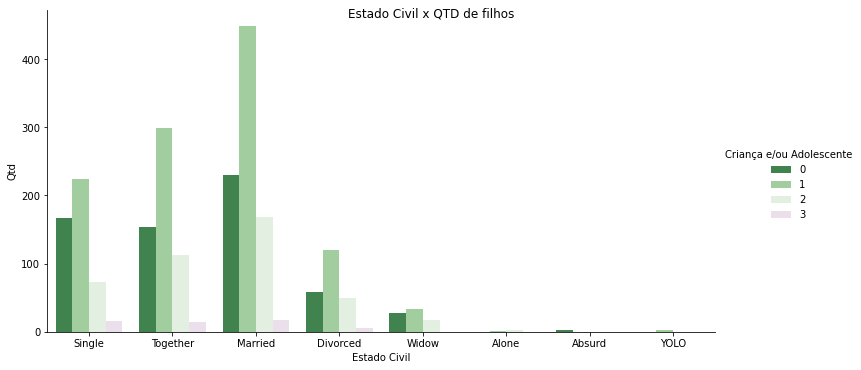

In [82]:
#cria coluna com a soma de criança e adolescente
df_case["Criança e/ou Adolescente"] = df_case["Kidhome"] + df_case["Teenhome"]

sns.set_palette("PRGn_r")
ca = sns.catplot(x='Marital_Status', data = df_case, hue='Criança e/ou Adolescente', kind='count', height=5, aspect=2)
ca.fig.suptitle("Estado Civil x QTD de filhos")
ca.set_ylabels("Qtd")
ca.set_xlabels("Estado Civil")

<function matplotlib.pyplot.show(close=None, block=None)>

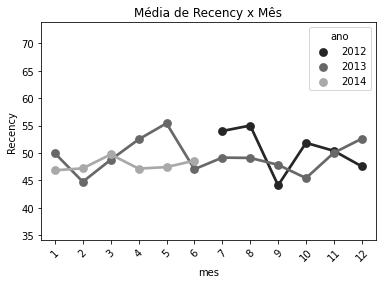

In [885]:
sns.pointplot(x='mes', y = 'Recency', data = df_case, kind="count", errwidth = 0, hue= "ano", color="darkgray")
plt.title("Média de Recency x Mês")

plt.xticks(rotation = 45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

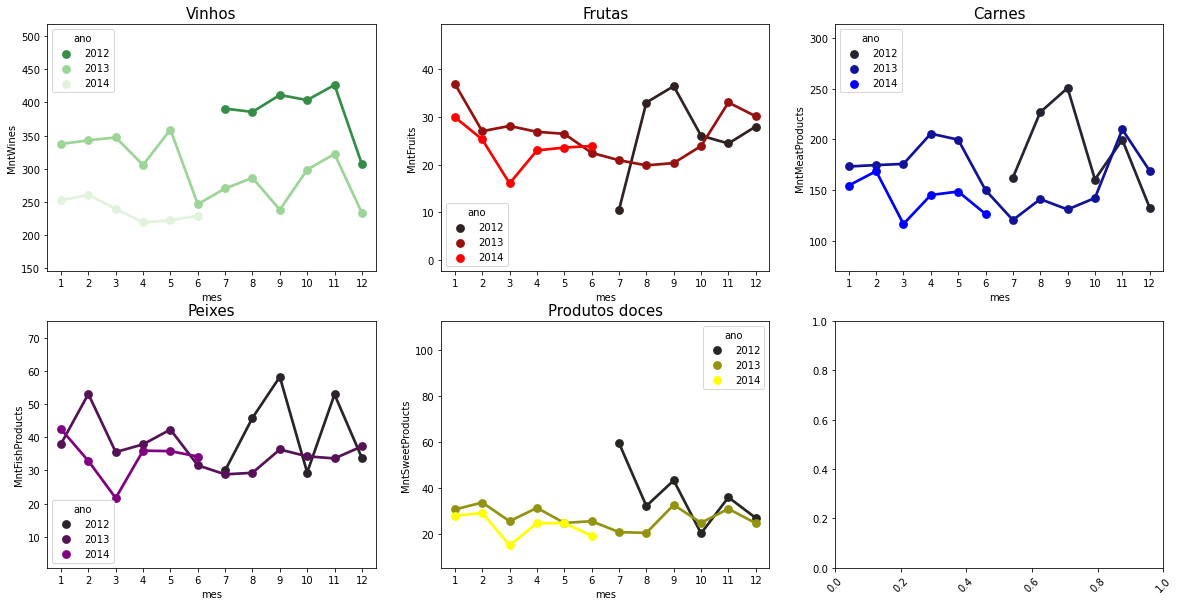

In [96]:
mesAno = []
periodos = []
i = 0
total = 0
totalgold = 0
vinho = 0
frutas = 0
carne = 0
peixe = 0
doce = 0

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            vinho += int(colunas[9])
            frutas += int(colunas[10])
            carne += int(colunas[11])
            peixe += int(colunas[12])
            doce += int(colunas[13])
            totalgold += int(colunas[14])
            
total = vinho + frutas + carne + peixe + doce
df_case['Total Vendas'] = df_case['MntWines'] + df_case['MntFruits'] + df_case['MntMeatProducts'] + df_case['MntFishProducts'] + df_case['MntSweetProducts']

df_case['Dt_Customer'] =  pd.to_datetime(df_case['Dt_Customer'], format='%Y/%m/%d')
df_case['mes'] = df_case['Dt_Customer'].dt.month
df_case['ano'] = df_case['Dt_Customer'].dt.year
df_case['mesAno'] = df_case['mes'].map(str) + '-' + df_case['ano'].map(str)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.pointplot(ax=axes[0, 0], x='mes', y = 'MntWines', data = df_case, kind="count", errwidth = 0, hue= "ano")
sns.pointplot(ax=axes[0, 1], x='mes', y = 'MntFruits', data = df_case, kind="count", errwidth = 0, hue= "ano", color="red")
sns.pointplot(ax=axes[0, 2], x='mes', y = 'MntMeatProducts', data = df_case, kind="count", errwidth = 0, hue= "ano", color="blue")
sns.pointplot(ax=axes[1, 0], x='mes', y = 'MntFishProducts', data = df_case, kind="count", errwidth = 0, hue= "ano", color="purple")
sns.pointplot(ax=axes[1, 1], x='mes', y = 'MntSweetProducts', data = df_case, kind="count", errwidth = 0, hue= "ano", color="yellow")
axes[0][0].set_title('Vinhos', fontdict={'fontsize':15})
axes[0][1].set_title('Frutas', fontdict={'fontsize':15})
axes[0][2].set_title('Carnes', fontdict={'fontsize':15})
axes[1][0].set_title('Peixes', fontdict={'fontsize':15})
axes[1][1].set_title('Produtos doces', fontdict={'fontsize':15})


plt.xticks(rotation = 45)
plt.show


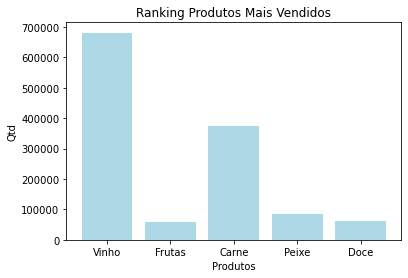

In [676]:
grupos = ['Vinho', 'Frutas', 'Carne', 'Peixe', 'Doce' ]
valores = [vinho, frutas, carne, peixe, doce]

plt.bar(grupos, valores, color = "lightblue")
plt.title("Ranking Produtos Mais Vendidos")
plt.xlabel("Produtos")
plt.ylabel("Qtd")
plt.show()

1258379 98609


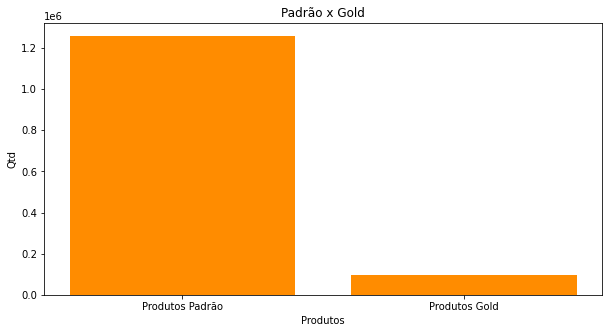

In [99]:
grupos = ["Produtos Padrão", "Produtos Gold"]
valores = [total, totalgold]

print(total, totalgold)

plt.figure(figsize=(10,5))
plt.bar(grupos, valores, color = "darkorange")
plt.title("Padrão x Gold")
plt.xlabel("Produtos")
plt.ylabel("Qtd")
plt.show()

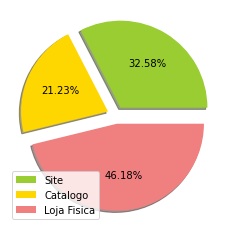

In [100]:
web = 0
catalog = 0
loja = 0
vendast = 0
desconto = 0

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            web += int(colunas[16])
            catalog += int(colunas[17])
            loja += int(colunas[18])
            desconto += int(colunas[15])
            
vendast = web + catalog + loja

vendas = [web, catalog, loja]
meios = ['Site', 'Catalogo', 'Loja Fisica']
colors = ['yellowgreen', 'gold', 'lightcoral']

explode = (0.1, 0.1, 0.1) 

plt.pie(vendas, autopct='%.2f%%', shadow=True, explode=explode, colors = colors)

plt.legend(meios, loc=3)

plt.show()


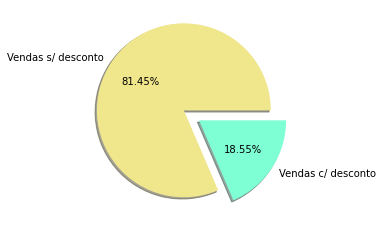

In [880]:
vendas = [vendast - desconto, desconto]
tipo_vendas = ['Vendas s/ desconto', 'Vendas c/ desconto']
colors = ['khaki', 'aquamarine']

explode = (0.1, 0.11) 

plt.pie(vendas, labels=tipo_vendas, autopct='%.2f%%', shadow=True, explode=explode, colors = colors)

plt.show()

In [862]:
df = pd.DataFrame({'Total Vendas Site': web,
                   'Total Vendas Catalogo': catalog,
                   'Total Vendas Loja': loja,
                   'Total de Vendas': vendast,
                   'Vendas com desconto': desconto}, index=[0])
df

,Total Vendas Site,Total Vendas Catalogo,Total Vendas Loja,Total de Vendas,Vendas com desconto
0,9150,5963,12970,28083,5208


<function matplotlib.pyplot.show(close=None, block=None)>

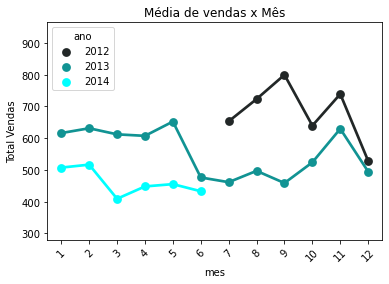

In [108]:
sns.pointplot(x='mes', y = 'Total Vendas', data = df_case, kind="count", errwidth = 0, hue= "ano", color="cyan")
plt.title("Média de vendas x Mês")

plt.xticks(rotation = 45)
plt.show

Text(0, 0.5, 'Qtd')

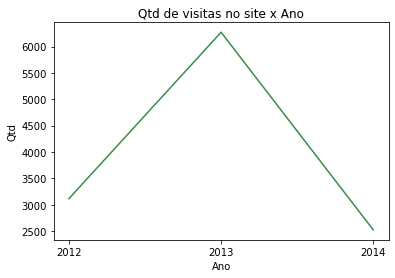

In [750]:
visit12 = 0
visit13 = 0
visit14 = 0
i = 0

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            colunas[7] =  pd.to_datetime(colunas[7], format='%Y/%m/%d')
            if colunas[7].year == 2012:
                visit12 += int(colunas[19])
            if colunas[7].year == 2013:
                visit13 += int(colunas[19])
            if colunas[7].year == 2014:
                visit14 += int(colunas[19])

anos = ['2012', '2013', '2014']
visitas = [visit12, visit13, visit14]

matplotlib.pyplot.plot(anos, visitas)
plt.title("Qtd de visitas no site x Ano")
plt.xlabel("Ano")
plt.ylabel("Qtd")

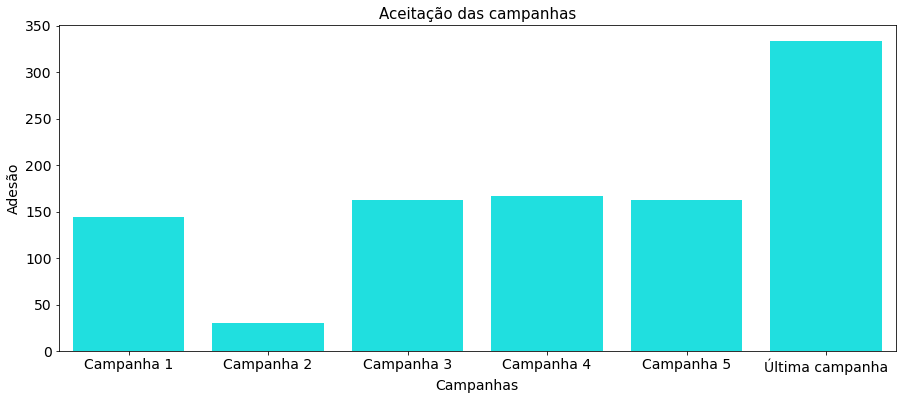

In [769]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
c6 = 0

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            c1 += int(colunas[23])
            c2 += int(colunas[24])
            c3 += int(colunas[20])
            c4 += int(colunas[21])
            c5 += int(colunas[22])
            c6 += int(colunas[28])

campanhas = ["Campanha 1", "Campanha 2", "Campanha 3", "Campanha 4", "Campanha 5", "Última campanha"]
qtds = [c1, c2, c3, c4, c5, c6]

fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(x=campanhas, y=qtds, color= "cyan")

ax.set_title("Aceitação das campanhas", fontdict={'fontsize':15})

ax.set_xlabel('Campanhas', fontdict={'fontsize':14})

ax.set_ylabel('Adesão', fontdict={'fontsize':14})

ax.tick_params(labelsize=14)


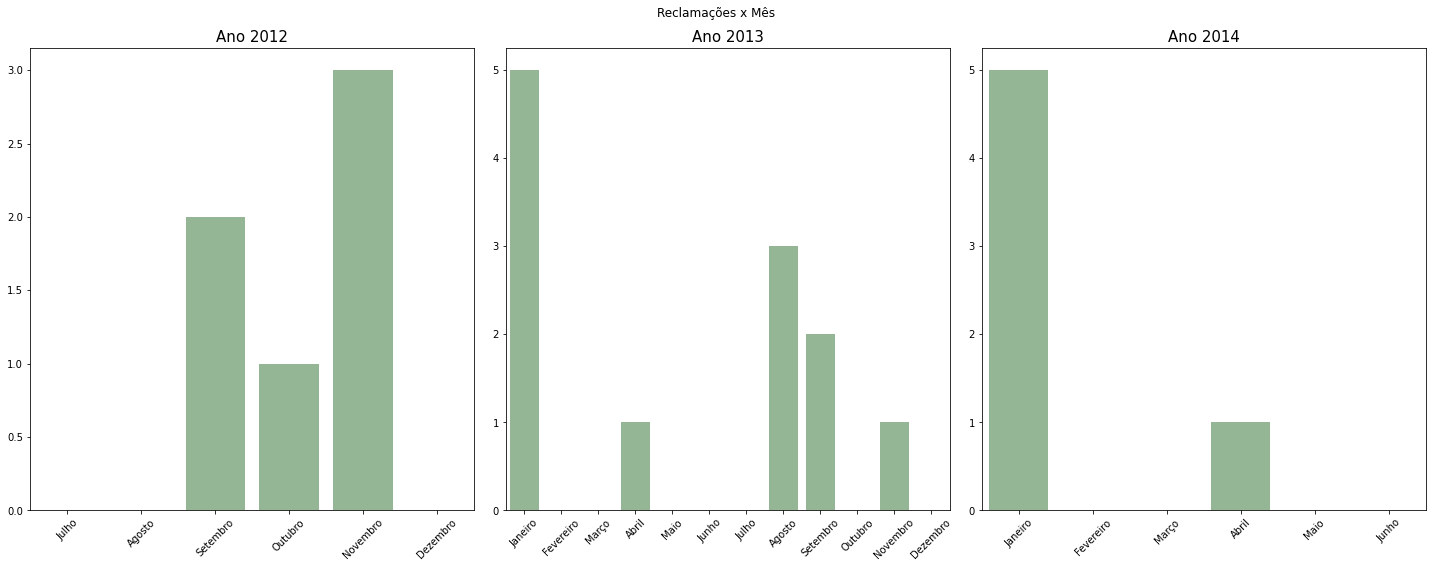

In [854]:
cjulho12 = 0
cagosto12 = 0
csetembro12 = 0
coutubro12 = 0
cnovembro12 = 0
cdezembro12 = 0

cjaneiro13 = 0
cfevereiro13 = 0
cmarco13 = 0
cabril13 = 0
cmaio13 = 0
cjunho13 = 0
cjulho13 = 0
cagosto13 = 0
csetembro13 = 0
coutubro13 = 0
cnovembro13 = 0
cdezembro13 = 0

cjaneiro14 = 0
cfevereiro14 = 0
cmarco14 = 0
cabril14 = 0
cmaio14 = 0
cjunho14 = 0

with open('C:\\Users\\henrique.malone\\Desktop\\ifood.csv', 'r') as txt_file:
    for line_number, content in enumerate(txt_file):
        if line_number:  # pula cabeçalho
            colunas = content.strip().split(separador)
            colunas[7] =  pd.to_datetime(colunas[7], format='%Y/%m/%d')
            if colunas[7].year == 2012:
                if colunas[7].month == 7:
                    cjulho12 += int(colunas[25])
                if colunas[7].month == 8:
                    cagosto12 += int(colunas[25])
                if colunas[7].month == 9:
                    csetembro12 += int(colunas[25])
                if colunas[7].month == 10:
                    coutubro12 += int(colunas[25])
                if colunas[7].month == 11:
                    cnovembro12 += int(colunas[25])
                if colunas[7].month == 12:
                    cdezembro12 += int(colunas[25])
                    
            if colunas[7].year == 2013:
                if colunas[7].month == 1:
                    cjaneiro13 += int(colunas[25])
                if colunas[7].month == 2:
                    cfevereiro13 += int(colunas[25])
                if colunas[7].month == 3:
                    cmarco13 += int(colunas[25])
                if colunas[7].month == 4:
                    cabril13 += int(colunas[25])
                if colunas[7].month == 5:
                    cmaio13 += int(colunas[25])
                if colunas[7].month == 6:
                    cjunho13 += int(colunas[25])
                if colunas[7].month == 7:
                    cjulho13 += int(colunas[25])
                if colunas[7].month == 8:
                    cagosto13 += int(colunas[25])
                if colunas[7].month == 9:
                    csetembro13+= int(colunas[25])
                if colunas[7].month == 10:
                    coutubro13 += int(colunas[25])
                if colunas[7].month == 11:
                    cnovembro13 += int(colunas[25])
                if colunas[7].month == 12:
                    cdezembro13 += int(colunas[25])
                    
            if colunas[7].year == 2014:
                if colunas[7].month == 1:
                    cjaneiro14 += int(colunas[25])
                if colunas[7].month == 2:
                    cfevereiro14 += int(colunas[25])
                if colunas[7].month == 3:
                    cmarco14 += int(colunas[25])
                if colunas[7].month == 4:
                    cabril14 += int(colunas[25])
                if colunas[7].month == 5:
                    cmaio14 += int(colunas[25])
                if colunas[7].month == 6:
                    cjunho14 += int(colunas[25])
                    
meses2012 = ["Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
val12 = [cjulho12, cagosto12, csetembro12, coutubro12, cnovembro12, cdezembro12]

meses2013 = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
val13 = [cjaneiro13, cfevereiro13, cmarco13, cabril13, cmaio13, cjunho13, cjulho13, cagosto13, csetembro13, coutubro13, cnovembro13, cdezembro13]

meses2014 = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"]
val14 = [cjaneiro13, cfevereiro13, cmarco13, cabril13, cmaio13, cjunho13]

fig, axes = plt.subplots(1, 3,figsize=(20, 8))
sns.barplot(ax=axes[0], x=meses2012, y = val12, data = df_case, color='darkseagreen')
sns.barplot(ax=axes[1], x=meses2013, y = val13, data = df_case, color='darkseagreen')
sns.barplot(ax=axes[2], x=meses2014, y = val14, data = df_case, color='darkseagreen')
fig.suptitle('Reclamações x Mês', fontdict={'fontsize':20})
axes[0].set_title('Ano 2012', fontdict={'fontsize':15})
axes[1].set_title('Ano 2013', fontdict={'fontsize':15})
axes[2].set_title('Ano 2014', fontdict={'fontsize':15})
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
